# CASE STUDY ON UNSUPERVISED LEARNING

# Importing necessary libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\jenan\Downloads\Wine_clust .csv")

# Checking the basic details of the dataset

In [3]:
#To display the first five rows of the dataset
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#To find the number of rows and columns in the dataset
data.shape

(178, 13)

In [5]:
#To find the column names
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
#To get statistical summary of numerical columns
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Visualization of the dataset

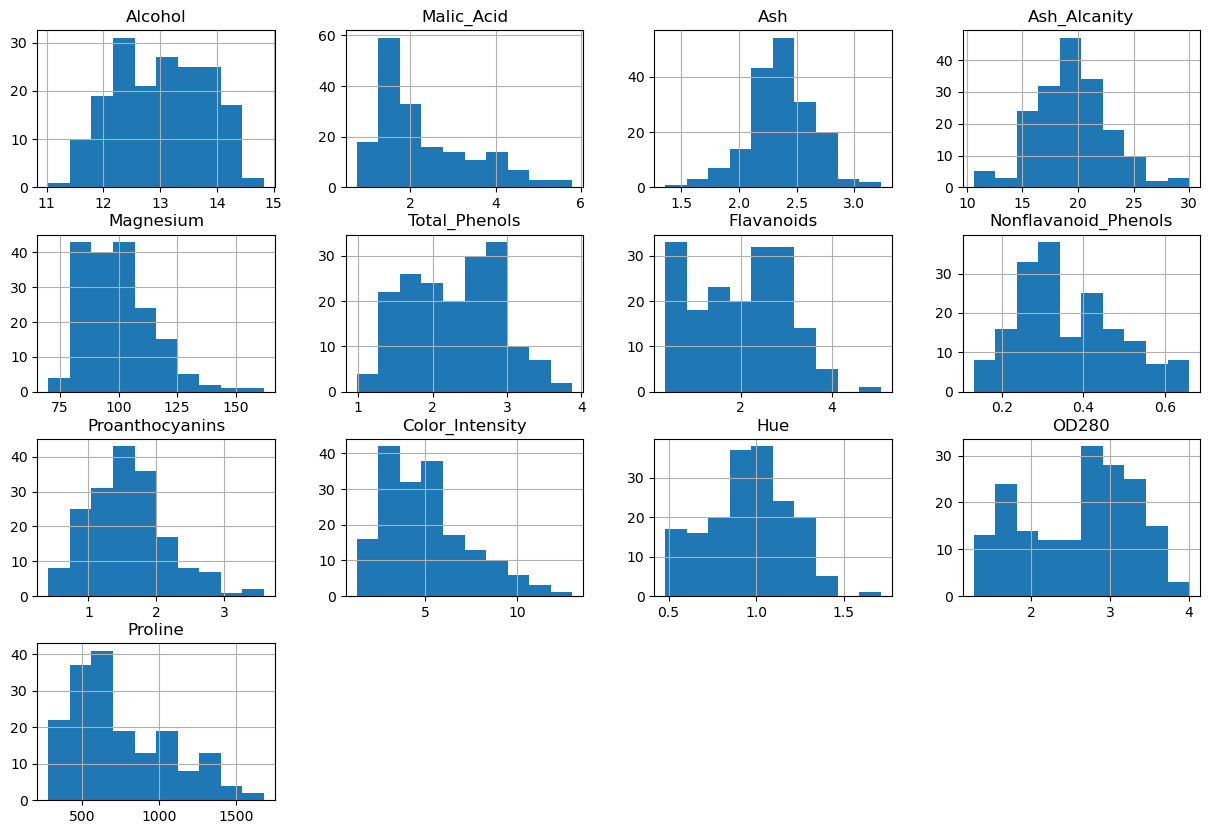

In [8]:
#Plotting histogram to analyse the distribution of features
data.hist(figsize = (15,10))
plt.show()

In [9]:
#Checking for null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no missing values.

# Outlier detection and handling

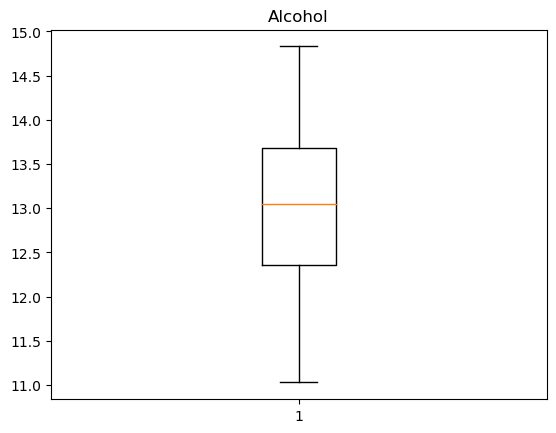

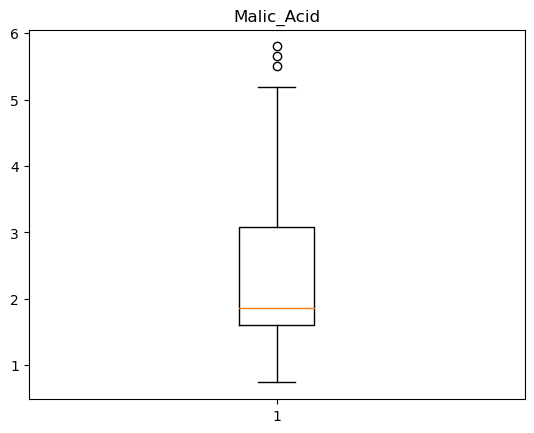

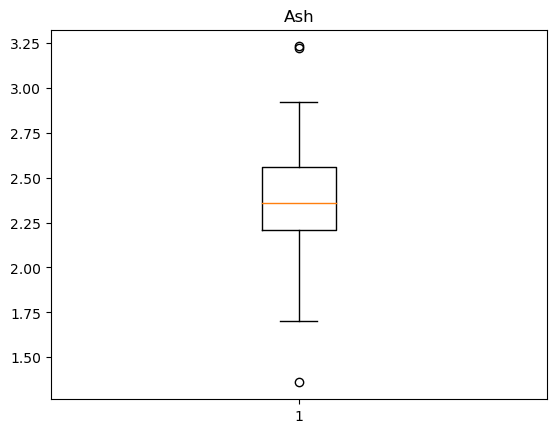

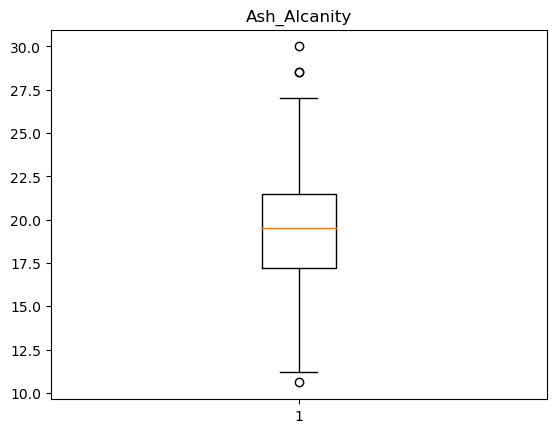

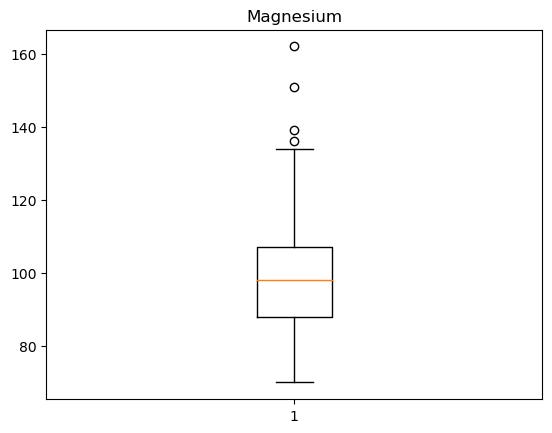

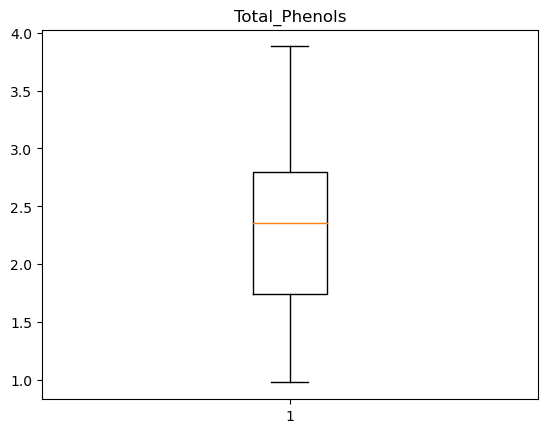

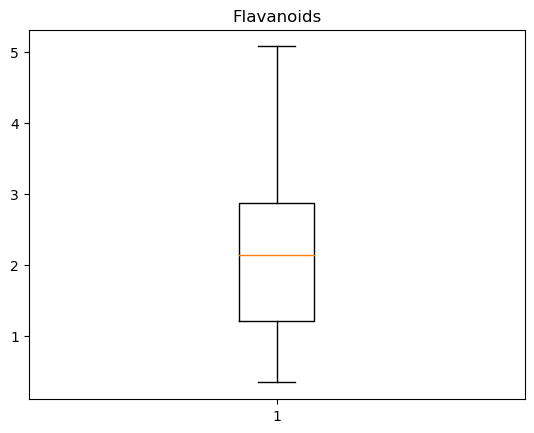

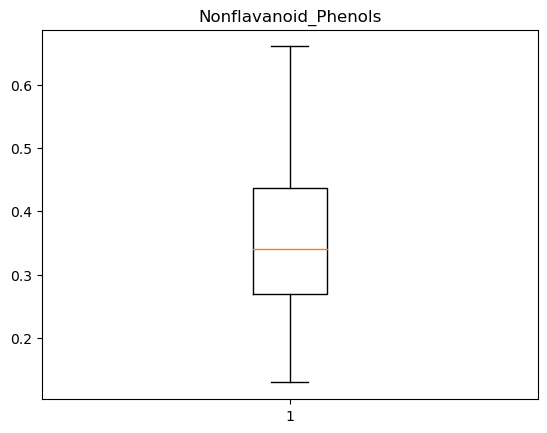

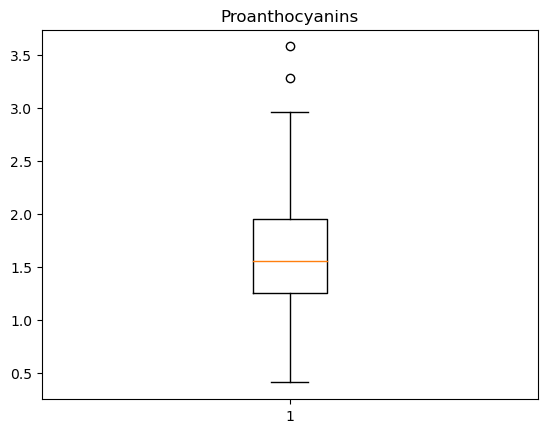

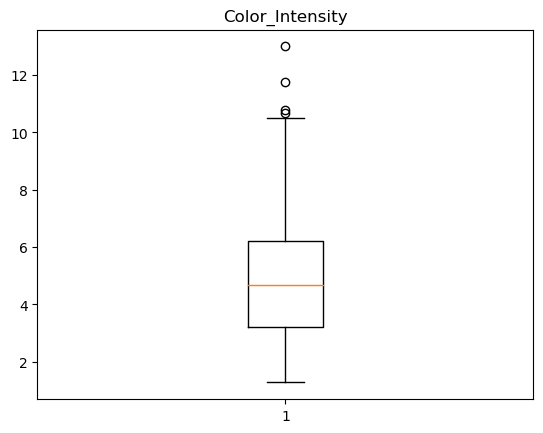

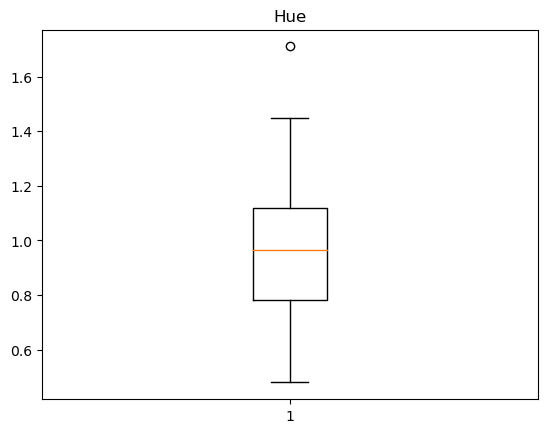

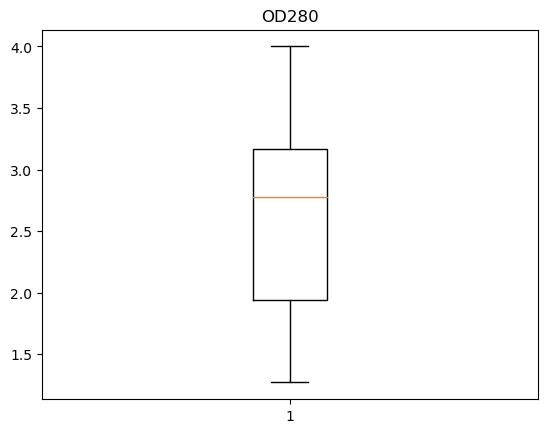

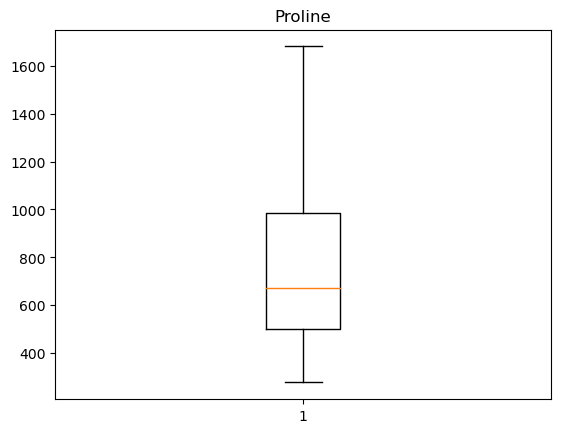

In [10]:
#Boxplot to detect the outliers
col=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()

In [11]:
#Finding the outliers in 'Malic_Acid'
Q1=np.percentile(data['Malic_Acid'],25,method='midpoint')
Q2=np.percentile(data['Malic_Acid'],50,method='midpoint')
Q3=np.percentile(data['Malic_Acid'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['Malic_Acid']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)


First quartile,Q1 = 1.605
Second quartile,Q2 = 1.8650000000000002
Third quartile,Q3 = 3.065
Inter quartile range = 1.46
Lower limit = -0.585
Upper limit = 5.255
Outliers are  [5.8, 5.51, 5.65]


In [12]:
#To get index of the outliers
ind=data['Malic_Acid']>up_lim
data.loc[ind].index

Int64Index([123, 137, 173], dtype='int64')

In [13]:
#Removing the outliers in 'Malic_Acid'
data.drop([123, 137, 173],inplace=True)

In [14]:
#Finding the outliers in 'Ash'
Q1=np.percentile(data['Ash'],25,method='midpoint')
Q2=np.percentile(data['Ash'],50,method='midpoint')
Q3=np.percentile(data['Ash'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['Ash']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 2.21
Second quartile,Q2 = 2.36
Third quartile,Q3 = 2.5549999999999997
Inter quartile range = 0.34499999999999975
Lower limit = 1.6925000000000003
Upper limit = 3.0724999999999993
Outliers are  [3.22, 1.36, 3.23]


In [15]:
#Finding the index of the outliers below the lower limit
ind_1=data['Ash']<low_lim
data.loc[ind_1].index

Int64Index([59], dtype='int64')

In [16]:
#Finding the index of the outliers above the upper limit
ind_2=data['Ash']>up_lim
data.loc[ind_2].index

Int64Index([25, 121], dtype='int64')

In [17]:
#Removing all the outliers in 'Ash'
data.drop([59, 25, 121],inplace=True)

In [18]:
#Finding the outliers in 'Ash_Alcanity'
Q1=np.percentile(data['Ash_Alcanity'],25,method='midpoint')
Q2=np.percentile(data['Ash_Alcanity'],50,method='midpoint')
Q3=np.percentile(data['Ash_Alcanity'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['Ash_Alcanity']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 17.15
Second quartile,Q2 = 19.25
Third quartile,Q3 = 21.5
Inter quartile range = 4.350000000000001
Lower limit = 10.624999999999996
Upper limit = 28.025000000000002
Outliers are  [30.0, 28.5]


In [19]:
#Finding the index of the outliers
ind=data['Ash_Alcanity']>up_lim
data.loc[ind].index

Int64Index([73, 127], dtype='int64')

In [20]:
#Removing the outliers
data.drop([73, 127],inplace=True)

In [21]:
#Finding the outliers in 'Magnesium'
Q1=np.percentile(data['Magnesium'],25,method='midpoint')
Q2=np.percentile(data['Magnesium'],50,method='midpoint')
Q3=np.percentile(data['Magnesium'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['Magnesium']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 88.0
Second quartile,Q2 = 98.0
Third quartile,Q3 = 107.0
Inter quartile range = 19.0
Lower limit = 59.5
Upper limit = 135.5
Outliers are  [151, 136, 162]


In [22]:
#Finding the index of the outliers
ind=data['Magnesium']>up_lim
data.loc[ind].index

Int64Index([69, 78, 95], dtype='int64')

In [23]:
#Removing the outliers in 'Magnesium'
data.drop([69, 78, 95],inplace=True)

In [24]:
#Finding the outliers in 'Proanthocyanins'
Q1=np.percentile(data['Proanthocyanins'],25,method='midpoint')
Q2=np.percentile(data['Proanthocyanins'],50,method='midpoint')
Q3=np.percentile(data['Proanthocyanins'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['Proanthocyanins']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 1.25
Second quartile,Q2 = 1.54
Third quartile,Q3 = 1.9249999999999998
Inter quartile range = 0.6749999999999998
Lower limit = 0.23750000000000027
Upper limit = 2.9374999999999996
Outliers are  [2.96, 3.58]


In [25]:
#Finding the index of the outliers
ind=data['Proanthocyanins']>up_lim
data.loc[ind].index

Int64Index([14, 110], dtype='int64')

In [26]:
#Removing the outliers in 'Proanthocyanins'
data.drop([14, 110],inplace=True)

In [27]:
#Finding the outliers in 'Color_Intensity'
Q1=np.percentile(data['Color_Intensity'],25,method='midpoint')
Q2=np.percentile(data['Color_Intensity'],50,method='midpoint')
Q3=np.percentile(data['Color_Intensity'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['Color_Intensity']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 3.27
Second quartile,Q2 = 4.8
Third quartile,Q3 = 6.25
Inter quartile range = 2.98
Lower limit = -1.1999999999999997
Upper limit = 10.719999999999999
Outliers are  [10.8, 13.0, 11.75]


In [28]:
#Finding the index of the outliers
ind=data['Color_Intensity']>up_lim
data.loc[ind].index

Int64Index([151, 158, 159], dtype='int64')

In [29]:
#Removing the outliers in 'Color_Intensity'
data.drop([151, 158, 159],inplace=True)

In [30]:
#Finding the outliers in 'Hue'
Q1=np.percentile(data['Hue'],25,method='midpoint')
Q2=np.percentile(data['Hue'],50,method='midpoint')
Q3=np.percentile(data['Hue'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['Hue']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 0.795
Second quartile,Q2 = 0.97
Third quartile,Q3 = 1.12
Inter quartile range = 0.32500000000000007
Lower limit = 0.30749999999999994
Upper limit = 1.6075000000000002
Outliers are  [1.71]


In [31]:
#Finding the index of the outliers
ind=data['Hue']>up_lim
data.loc[ind].index

Int64Index([115], dtype='int64')

In [32]:
#Removing the outlier in 'Hue'
data.drop([115],inplace=True)

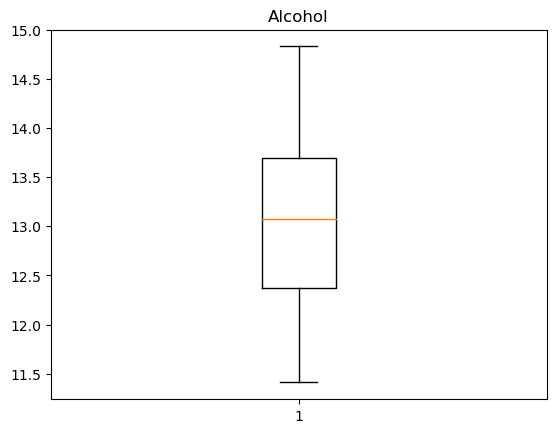

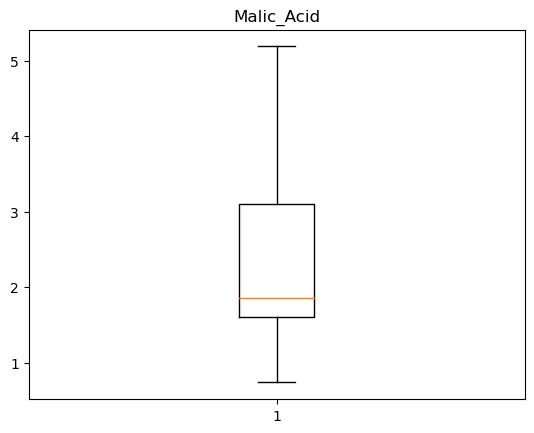

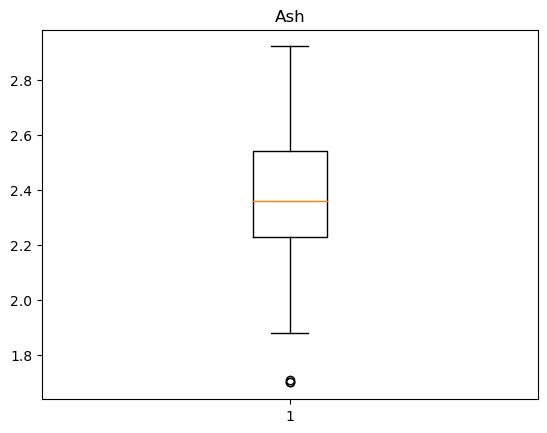

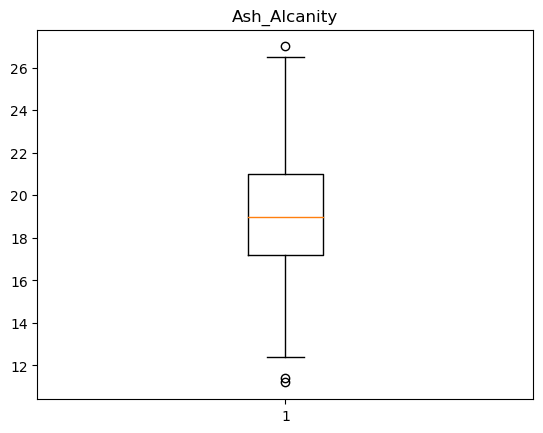

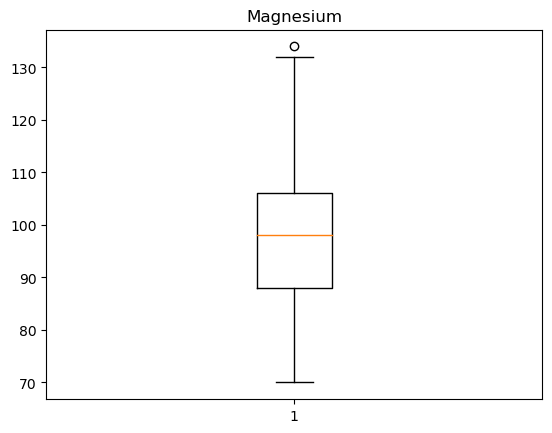

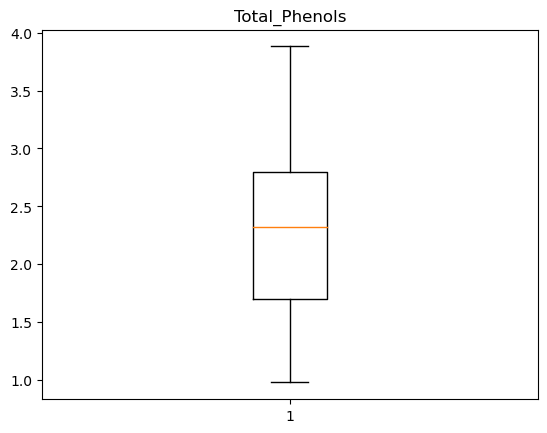

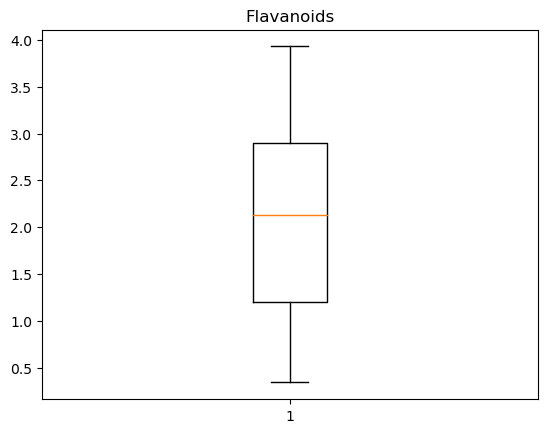

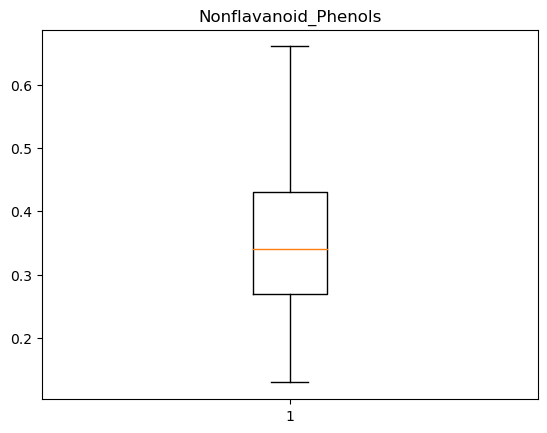

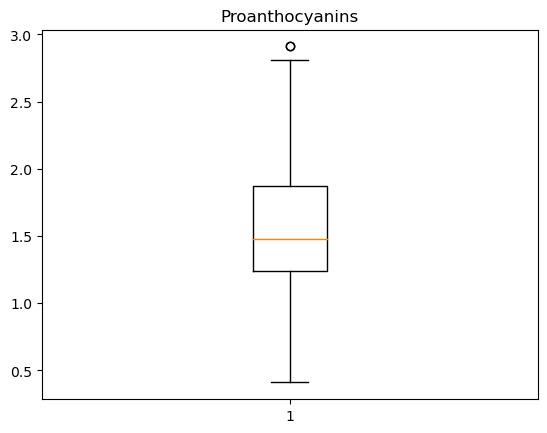

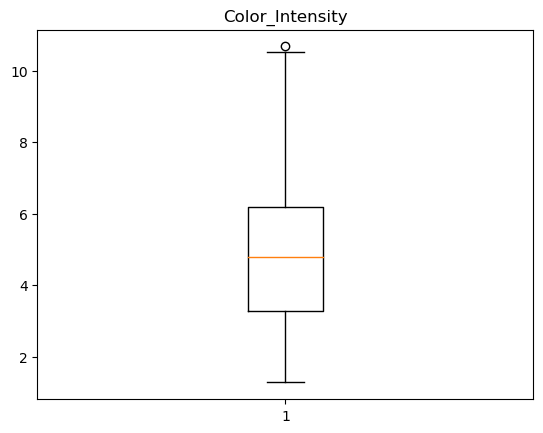

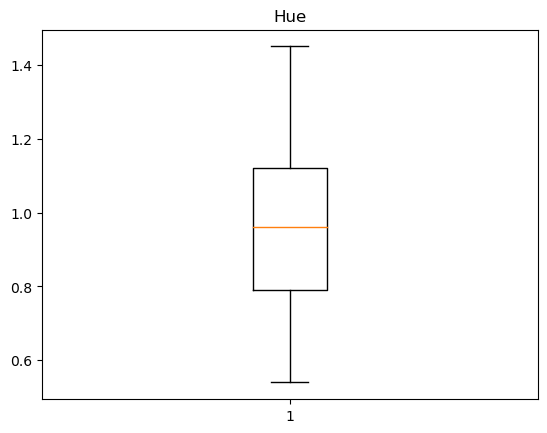

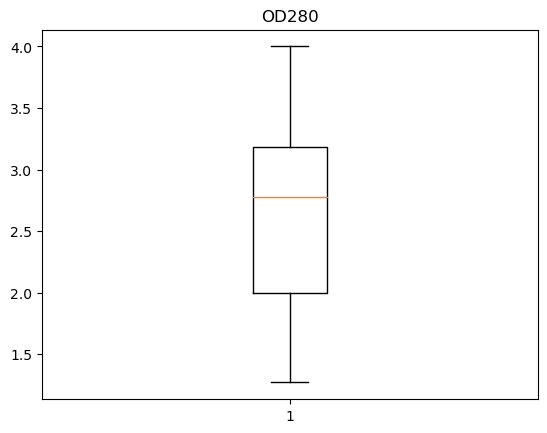

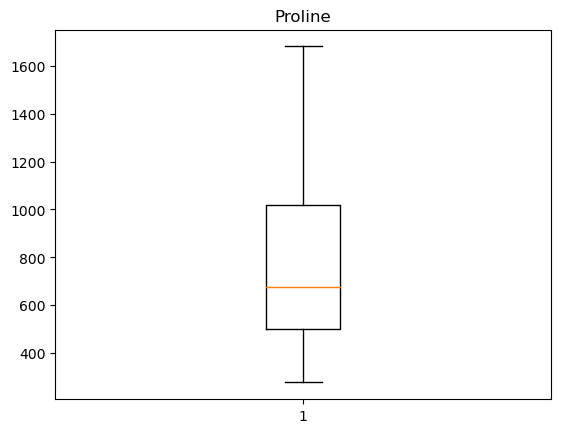

In [33]:
#Boxplot to check whether the outliers are removed
col=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()

# Checking correlation

In [34]:
#Correlation matrix
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.096651,0.225343,-0.338434,0.421233,0.325599,0.302557,-0.175275,0.215463,0.540855,-0.010480,0.108512,0.652425
Malic_Acid,0.096651,1.000000,0.183716,0.311024,0.030146,-0.369455,-0.460262,0.299642,-0.241993,0.304192,-0.582454,-0.399525,-0.182090
Ash,0.225343,0.183716,1.000000,0.320691,0.421118,0.106043,0.043875,0.090586,0.031043,0.210859,-0.043165,-0.032896,0.271846
Ash_Alcanity,-0.338434,0.311024,0.320691,1.000000,-0.176902,-0.453056,-0.507433,0.340402,-0.308068,-0.031718,-0.318442,-0.375677,-0.472429
Magnesium,0.421233,0.030146,0.421118,-0.176902,1.000000,0.239446,0.199186,-0.235835,0.099609,0.346902,-0.021651,0.021406,0.449599
Total_Phenols,0.325599,-0.369455,0.106043,-0.453056,0.239446,1.000000,0.882622,-0.497526,0.642021,-0.065892,0.471543,0.706372,0.515427
Flavanoids,0.302557,-0.460262,0.043875,-0.507433,0.199186,0.882622,1.000000,-0.597872,0.737851,-0.171084,0.589664,0.784737,0.524336
Nonflavanoid_Phenols,-0.175275,0.299642,0.090586,0.340402,-0.235835,-0.497526,-0.597872,1.000000,-0.430748,0.110328,-0.279525,-0.525896,-0.310505
Proanthocyanins,0.215463,-0.241993,0.031043,-0.308068,0.099609,0.642021,0.737851,-0.430748,1.000000,-0.041662,0.345698,0.585839,0.367174
Color_Intensity,0.540855,0.304192,0.210859,-0.031718,0.346902,-0.065892,-0.171084,0.110328,-0.041662,1.000000,-0.484898,-0.425764,0.360802


<Axes: >

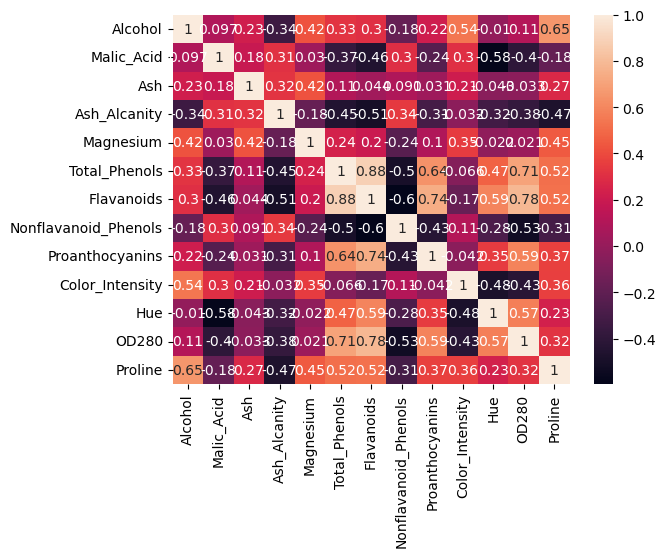

In [35]:
#Correlation heatmap
sns.heatmap(data.corr(),annot=True)

# Scaling

In [36]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X=std_scaler.fit_transform(data)
X=pd.DataFrame(X)

# K-Means Clustering

In [37]:
from sklearn.cluster import KMeans

#To find the optimum number of clusters using the Elbow method
wcss=[]
for i in range (1,11):
    km=KMeans(n_clusters=i,n_init=20)
    km.fit(X)
    css=km.inertia_
    print('Clusters=',i,"wcss= ",css)
    wcss.append(css)

Clusters= 1 wcss=  2093.0
Clusters= 2 wcss=  1453.2302460891567
Clusters= 3 wcss=  1080.418730392001
Clusters= 4 wcss=  996.9166808272244
Clusters= 5 wcss=  936.735883627325
Clusters= 6 wcss=  886.1537810846589
Clusters= 7 wcss=  836.5186642835367
Clusters= 8 wcss=  793.3313756142139
Clusters= 9 wcss=  762.3866702968904
Clusters= 10 wcss=  738.0352687533698


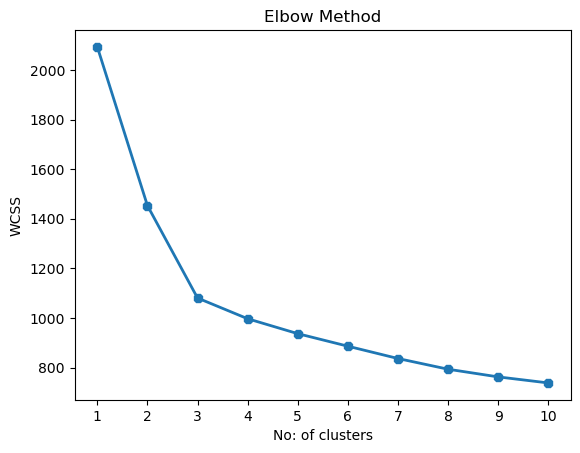

In [38]:
#Plotting the number of clusters and wcss to get elbow graph to find the optimum number of clusters
plt.plot(range(1,11),wcss,linewidth=2,marker='8')
plt.title('Elbow Method')
plt.xlabel("No: of clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

We can see that the graph forms an elbow at 3.So the optimum number of clusters is 3.

In [39]:
#Creating the k-means clustering model with optimum number of clusters
km=KMeans(n_clusters=3,n_init=20)
km.fit(X)
cluster_labels=km.predict(X)
print("The cluster labels are : \n",cluster_labels)

The cluster labels are : 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
#Evaluating the clustering model using silhoutte score
from sklearn.metrics import silhouette_score
sil_kmm=silhouette_score(X,cluster_labels)
print("Silhoutte score :",sil_kmm)

Silhoutte score : 0.3013979201701521


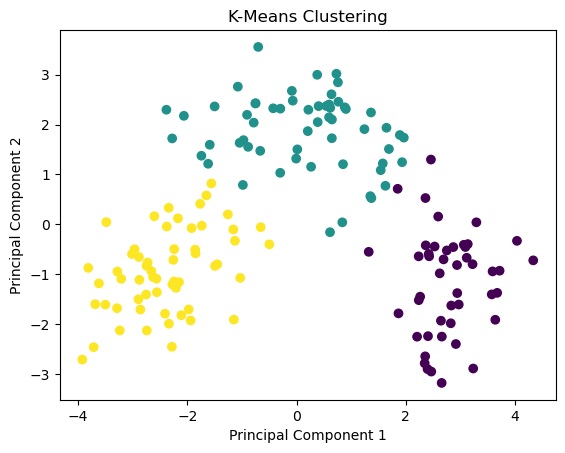

In [41]:
#Visualizing the clusters using Principal Component Analysis(PCA)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X)
plt.scatter(x_pca[:,0],x_pca[:,1],c=cluster_labels,cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Agglomerative Hierarchical Clustering

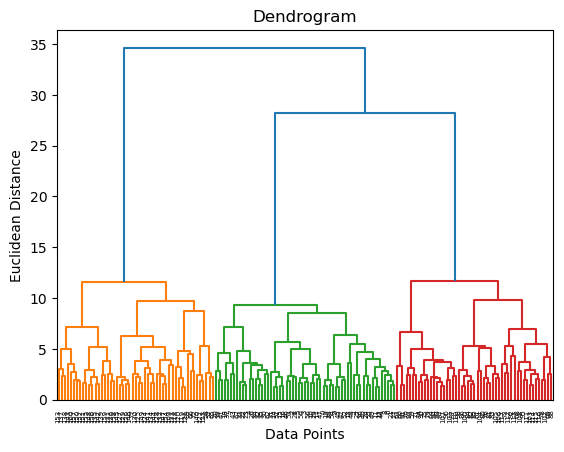

In [42]:
import scipy.cluster.hierarchy as sch

#To find the optimum number of clusters using dendrogram
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

From the dendrogram we can find that the optimum number of clusters is 3.

In [43]:
#Creating agglomerative hierarchical clustering model with optimum number of clusters
from sklearn.cluster import AgglomerativeClustering
ahc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
ahc_labels=ahc.fit_predict(X)
print("The cluster labels are : \n",ahc_labels)

The cluster labels are : 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 0 0 2 0 0 1 1 2 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [44]:
#Evaluating the clustering model using silhoutte score
sil_ahc=silhouette_score(X,ahc_labels)
sil_ahc

0.29574004115878627

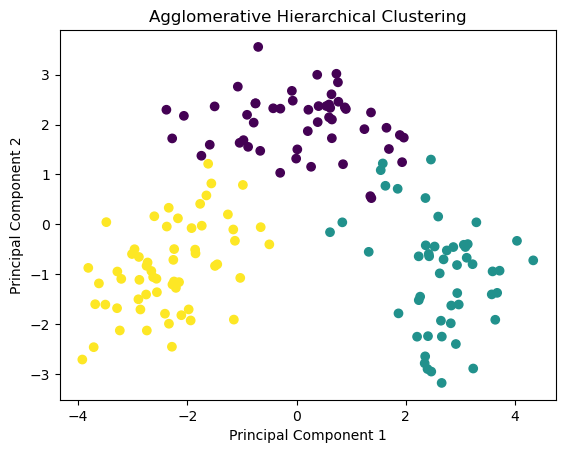

In [45]:
#Visualizing the clusters using PCA
plt.scatter(x_pca[:,0],x_pca[:,1],c=ahc_labels,cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# DBSCAN Clustering

DBSCAN clustering requires two parameters, epsilon(eps) and minimum number of points required to form a dense region.

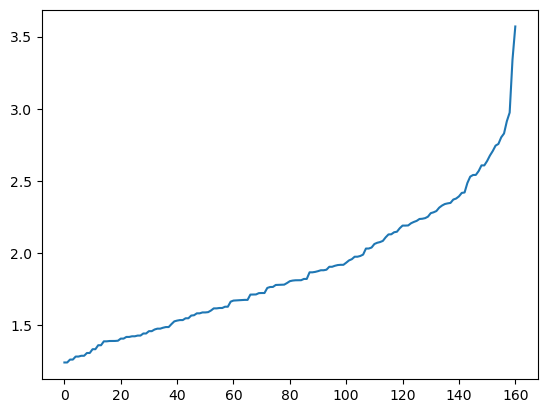

In [46]:
#Deciding optimal value for epsilon
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors()
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

The optimal value for epsilon is the distance value at the point of maximum curvature.We choose epsilon to be 3.

In [47]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=20).fit(X)
label=db.labels_
print("Unique labels are:",np.unique(label))

Unique labels are: [-1  0  1]


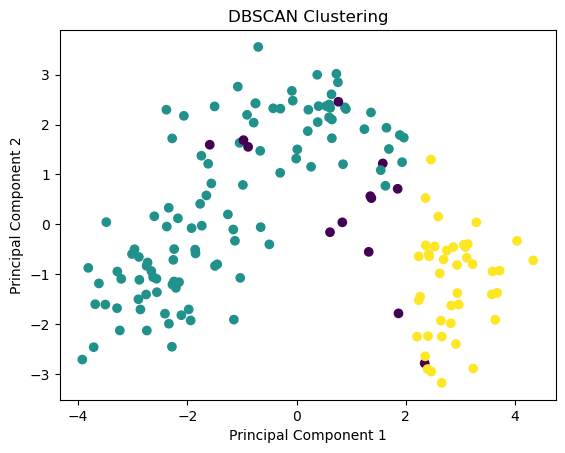

In [48]:
#Visualizing the clusters using PCA
plt.scatter(x_pca[:,0],x_pca[:,1],c=label,cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()